## IPL Analysis

##### Importing library 

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path=r"D:\my_git\ipl_2025_analysis\data\ipl_2025_deliveries.csv"

In [5]:
df=pd.read_csv(path)

In [6]:
df.describe()

,match_id,season,match_no,innings,over,runs_of_bat,extras,wide,legbyes,byes,noballs
count,17246.000000,17246.0,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000
mean,202537.187232,2025.0,37.187232,1.473733,9.480314,1.467935,0.068248,0.038212,0.012061,0.001566,0.004001
std,21.458575,0.0,21.458575,0.501410,5.650300,1.810856,0.336843,0.191713,0.109160,0.039538,0.063128
min,202501.000000,2025.0,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202519.000000,2025.0,19.000000,1.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202537.000000,2025.0,37.000000,1.000000,9.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,202556.000000,2025.0,56.000000,2.000000,14.300000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202574.000000,2025.0,74.000000,4.000000,19.600000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.head(3)

,match_id,season,phase,match_no,date,venue,batting_team,bowling_team,innings,over,...,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.1,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.2,...,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.3,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN


In [47]:
df.columns

Index(['match_id', 'season', 'phase', 'match_no', 'date', 'venue',
       'batting_team', 'bowling_team', 'innings', 'over', 'striker', 'bowler',
       'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs',
       'wicket_type', 'player_dismissed', 'fielder'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17246 entries, 0 to 17245
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          17246 non-null  int64  
 1   season            17246 non-null  int64  
 2   phase             17246 non-null  object 
 3   match_no          17246 non-null  int64  
 4   date              17246 non-null  object 
 5   venue             17246 non-null  object 
 6   batting_team      17246 non-null  object 
 7   bowling_team      17246 non-null  object 
 8   innings           17246 non-null  int64  
 9   over              17246 non-null  float64
 10  striker           17246 non-null  object 
 11  bowler            17246 non-null  object 
 12  runs_of_bat       17246 non-null  int64  
 13  extras            17246 non-null  int64  
 14  wide              17246 non-null  int64  
 15  legbyes           17246 non-null  int64  
 16  byes              17246 non-null  int64 

In [50]:
df.isnull().sum()

match_id                0
season                  0
phase                   0
match_no                0
date                    0
venue                   0
batting_team            0
bowling_team            0
innings                 0
over                    0
striker                 0
bowler                  0
runs_of_bat             0
extras                  0
wide                    0
legbyes                 0
byes                    0
noballs                 0
wicket_type         16373
player_dismissed    16373
fielder             16566
dtype: int64

#### Maximum run by batsman

In [98]:
max_run=df.groupby("striker")['runs_of_bat'].sum()

In [99]:
max_run=pd.DataFrame(max_run)
max_run=max_run.sort_values(by="runs_of_bat",ascending=False)

In [100]:
max_run.head(10)

,runs_of_bat
striker,
Sai Sudharsan,759
Suryakumar Yadav,717
Kohli,657
Shubman Gill,650
Mitchell Marsh,627
Shreyas Iyer,604
Prabhsimran,599
Jaiswal,559
Rahul,546


In [ ]:
top_run=max_run.reset_index().head(10)

C:\Users\briyani\AppData\Local\Temp\ipykernel_3580\2461841659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_run, x="striker",y="runs_of_bat",palette="viridis")


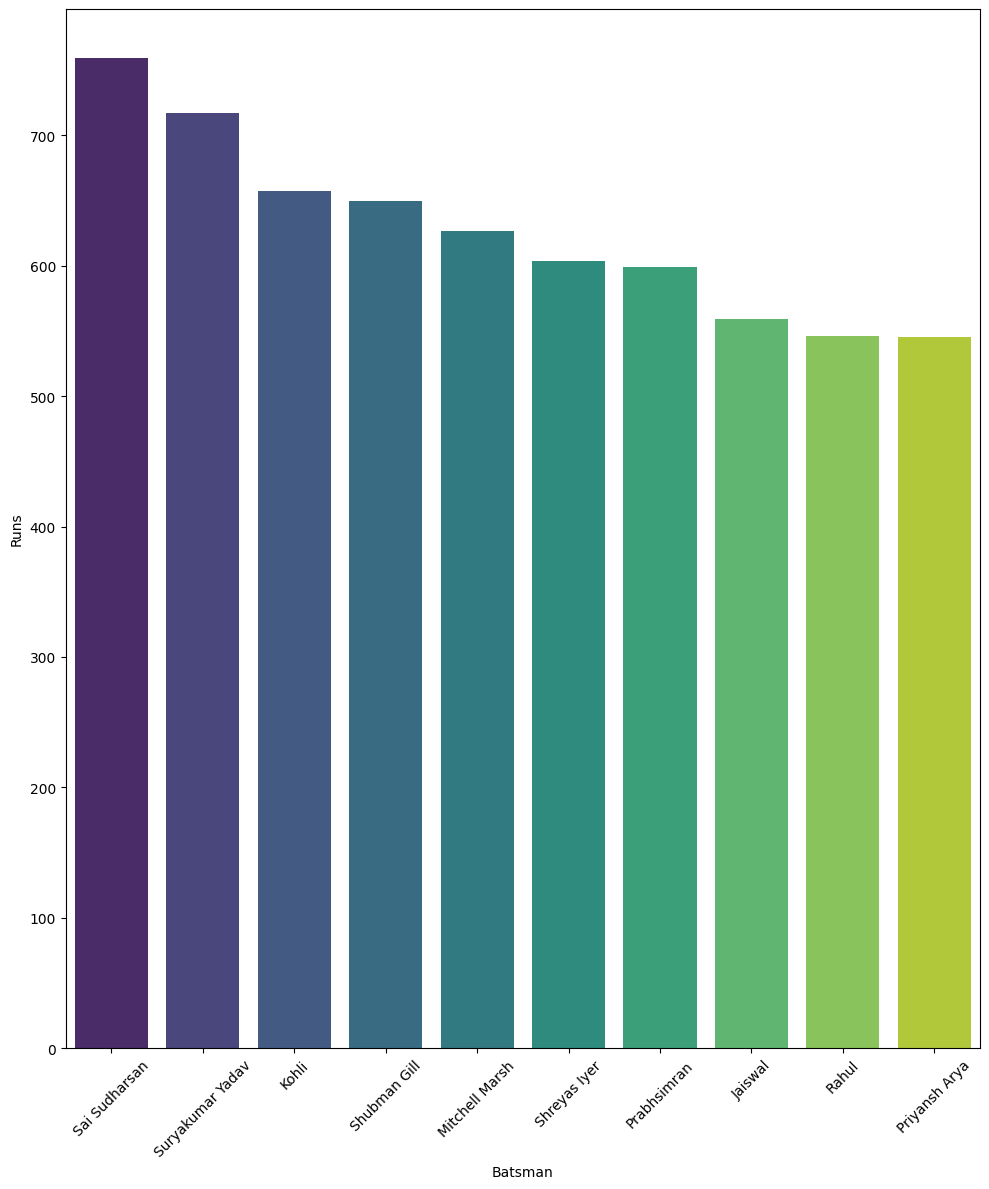

In [113]:
plt.figure(figsize=(10,12))
sns.barplot(data=top_run, x="striker",y="runs_of_bat",palette="viridis")
plt.xlabel("Batsman")
plt.xticks(rotation=45)
plt.ylabel("Runs")
plt.tight_layout()
plt.show()

In [ ]:
max_wide=df.groupby("bowler")["wide"].sum()

In [68]:
max_wide=pd.DataFrame(max_wide).sort_values(by="wide",ascending=False)

In [69]:
max_wide.head()

,wide
bowler,
Pathirana,32
Siraj,22
Tushar Deshpande,19
Sandeep Sharma,17
Harshal Patel,17


In [70]:
df["bowling_team"].unique()

array(['RCB', 'KKR', 'RR', 'SRH', 'CSK', 'MI', 'DC', 'LSG', 'GT', 'PBKS'],
      dtype=object)

In [72]:
csk_wide=df[df["bowling_team"]=="CSK"]

In [73]:
csk_max_wide=pd.DataFrame(csk_wide.groupby("bowler")["wide"].sum()).sort_values(by="wide",ascending=False)


In [74]:
csk_max_wide.head(12)

,wide
bowler,
Pathirana,32
Noor Ahmad,11
Khaleel Ahmed,7
Jamie Overton,4
Ashwin,3
Jadeja,3
Sam Curran,2
Hooda,1
Nathan Ellis,1


In [77]:
max_noball=pd.DataFrame(df.groupby("bowler")["noballs"].sum()).sort_values(by="noballs",ascending=False)

In [78]:
max_noball.head()

,noballs
bowler,
Harshal Patel,4
Yash Dayal,4
Vipraj Nigam,4
Mitchell Starc,4
Russell,3
